# KNN Classifier

It is a simple and versatile algorithm that can be applied to a variety of problems.  In this kernel, I build a k Nearest Neighbours classifier to classify the patients suffering from **Breast Cancer**.

 # Introduction to k Nearest Neighbours algorithm 

K-Nearest Neighbors (KNN) is a **supervised machine learning algorithm** used for classification and regression tasks. It is a non-parametric algorithm used for classification and regression tasks. Non-parametric means there is no assumption required for data distribution. In both classification and regression tasks, the input consists of the k closest training examples in the feature space. The output depends upon whether kNN is used for classification or regression purposes.

In kNN classification, the output is a class membership. The given data point is classified based on the majority of type of its neighbours. The data point is assigned to the most frequent class among its k nearest neighbours. Usually k is a small positive integer. If k=1, then the data point is simply assigned to the class of that single nearest neighbour.

# k Nearest Neighbours intuition

It simply calculates the **distance between a sample data point** and all the other training data points. The distance can be **Euclidean distance or Manhattan distance**. Then, it selects the k nearest data points where k can be any integer. Finally, it assigns the sample data point to the class to which the majority of the k data points belong.

In kNN algorithm, k is the number of nearest neighbours. Generally, k is an odd number because it helps to decide the majority of the class. When k=1, then the algorithm is known as the nearest neighbour algorithm.

Now, we want to classify a new data point X into Blue class or Red class. Suppose the value of k is 3. The kNN algorithm starts by calculating the distance between X and all the other data points. It then finds the 3 nearest points with least distance to point X.

In the final step of the kNN algorithm, we assign the new data point X to the majority of the class of the 3 nearest points. If 2 of the 3 nearest points belong to the class Red while 1 belong to the class Blue, then we classify the new data point as Red.

# How to decide the number of neighbours in kNN

The number of neighbours (k) in kNN is a parameter that we need to select at the time of model building. Selecting the optimal value of k in kNN is the most critical problem. A small value of k means that noise will have higher influence on the result. So, probability of overfitting is very high. A large value of k makes it computationally expensive in terms of time to build the kNN model. Also, a large value of k will have a smoother decision boundary which means lower variance but higher bias.

The data scientists choose an odd value of k if the number of classes is even. We can apply the elbow method to select the value of k. To optimize the results, we can use Cross Validation technique. Using the cross-validation technique, we can test the kNN algorithm with different values of k. The model which gives good accuracy can be considered to be an optimal choice. It depends on individual cases and at times best process is to run through each possible value of k and test our result.

# Import libraries 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for data visualization
%matplotlib inline

In [2]:
import warnings

warnings.filterwarnings('ignore')

# Import dataset 

In [3]:
data = pd.read_csv(r'C:\Users\paruc\OneDrive\Desktop\DS\3. Jan\4th\projects\KNN\brest cancer.txt')

In [4]:
data

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4
...,...,...,...,...,...,...,...,...,...,...,...
693,776715,3,1,1,1,3,2,1,1,1,2
694,841769,2,1,1,1,2,1,1,1,1,2
695,888820,5,10,10,3,7,3,8,10,2,4
696,897471,4,8,6,4,3,4,10,6,1,4


# Exploratory data analysis

In [5]:
data.shape

(698, 11)

In [6]:
data.head()

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


# Rename column names

In [7]:
col_names = ['Id', 'Clump_thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape', 'Marginal_Adhesion', 
             'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']

data.columns = col_names

In [8]:
col_names

['Id',
 'Clump_thickness',
 'Uniformity_Cell_Size',
 'Uniformity_Cell_Shape',
 'Marginal_Adhesion',
 'Single_Epithelial_Cell_Size',
 'Bare_Nuclei',
 'Bland_Chromatin',
 'Normal_Nucleoli',
 'Mitoses',
 'Class']

In [9]:
data.head(3)

,Id,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2


# Drop redundant columns

In [10]:
data.drop('Id', axis=1, inplace=True)

# INFO

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump_thickness              698 non-null    int64 
 1   Uniformity_Cell_Size         698 non-null    int64 
 2   Uniformity_Cell_Shape        698 non-null    int64 
 3   Marginal_Adhesion            698 non-null    int64 
 4   Single_Epithelial_Cell_Size  698 non-null    int64 
 5   Bare_Nuclei                  698 non-null    object
 6   Bland_Chromatin              698 non-null    int64 
 7   Normal_Nucleoli              698 non-null    int64 
 8   Mitoses                      698 non-null    int64 
 9   Class                        698 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [12]:
data.describe()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
count,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000
mean,4.416905,3.137536,3.210602,2.809456,3.217765,3.438395,2.869628,1.590258,2.690544
std,2.817673,3.052575,2.972867,2.856606,2.215408,2.440056,3.055004,1.716162,0.951596
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


# Changing datatype

In [13]:
data['Bare_Nuclei'] = pd.to_numeric(data['Bare_Nuclei'], errors='coerce')

In [14]:
data.dtypes

Clump_thickness                  int64
Uniformity_Cell_Size             int64
Uniformity_Cell_Shape            int64
Marginal_Adhesion                int64
Single_Epithelial_Cell_Size      int64
Bare_Nuclei                    float64
Bland_Chromatin                  int64
Normal_Nucleoli                  int64
Mitoses                          int64
Class                            int64
dtype: object

# check missing values

In [15]:
data.isnull().sum()

Clump_thickness                 0
Uniformity_Cell_Size            0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    16
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

isna() - detect missing or NaN (Not a Number) values in a DataFrame or Series.

In [16]:
data.isna().sum()

Clump_thickness                 0
Uniformity_Cell_Size            0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    16
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

# Data Visualization

### Univariate plots

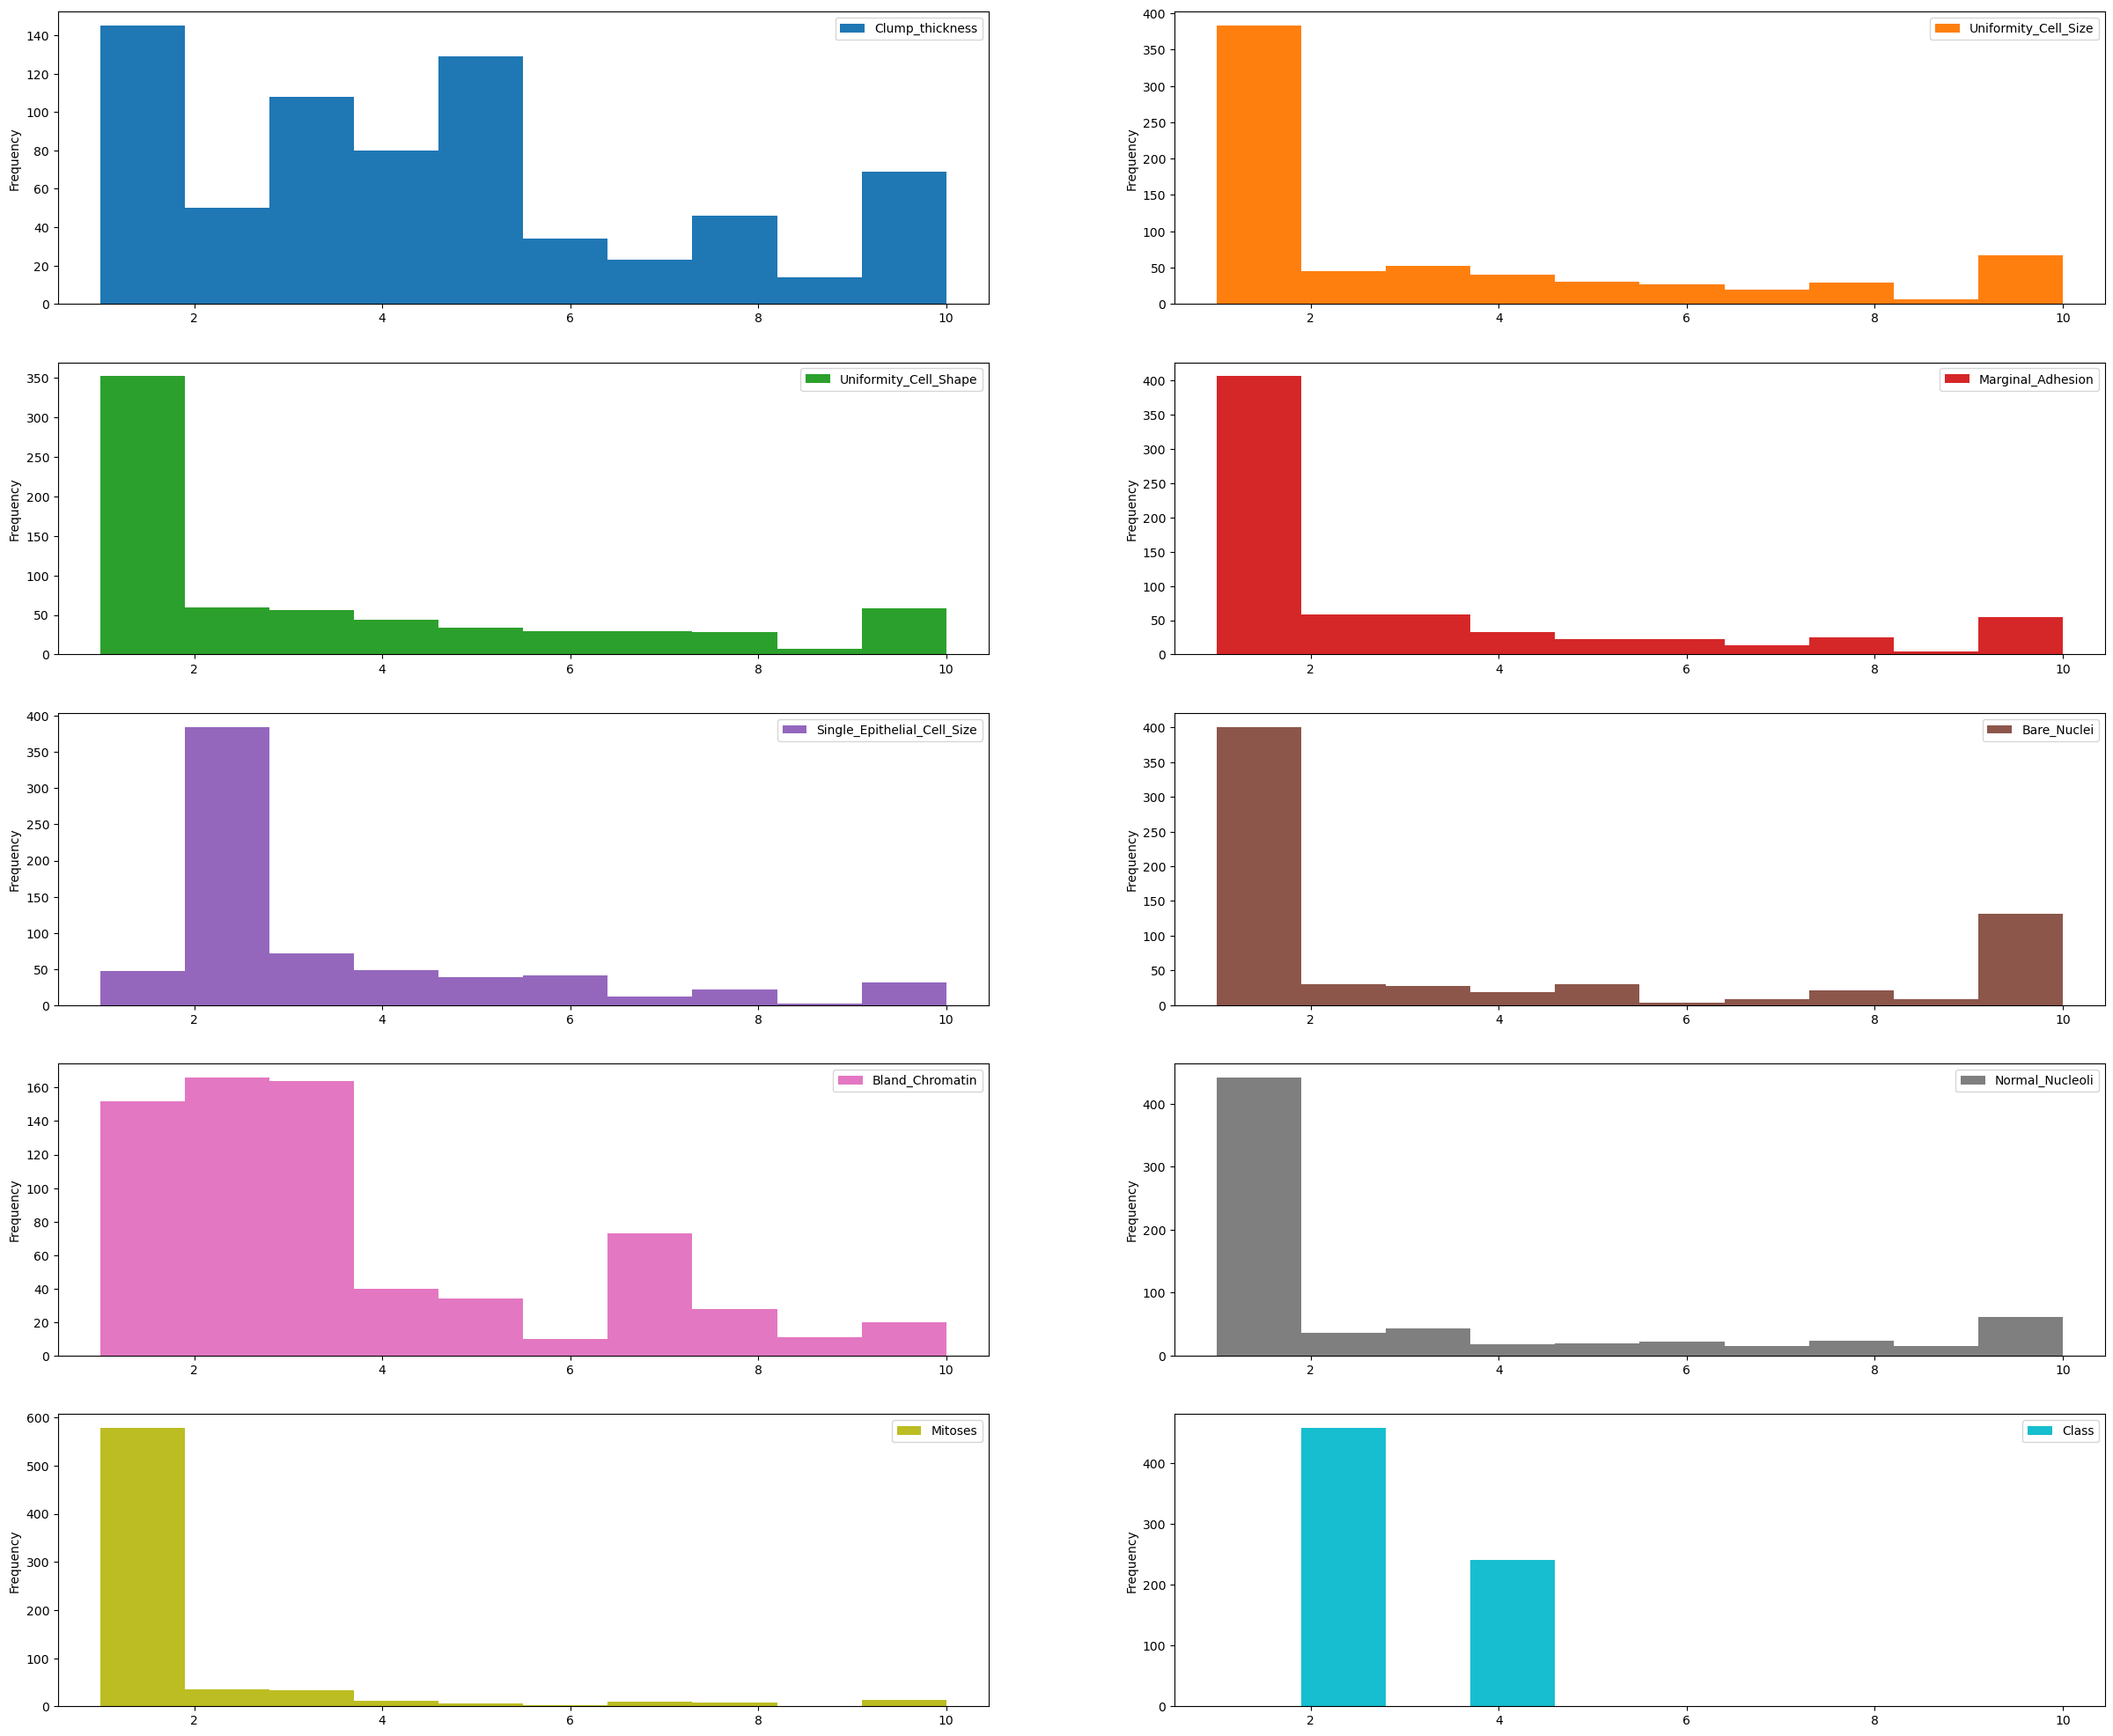

In [17]:
plt.rcParams['figure.figsize']=(30,25)

data.plot(kind='hist', bins=10, subplots=True, layout=(5,2), sharex=False, sharey=False)

plt.show()

### Multivariate plots

In [20]:
correlation = data.corr()

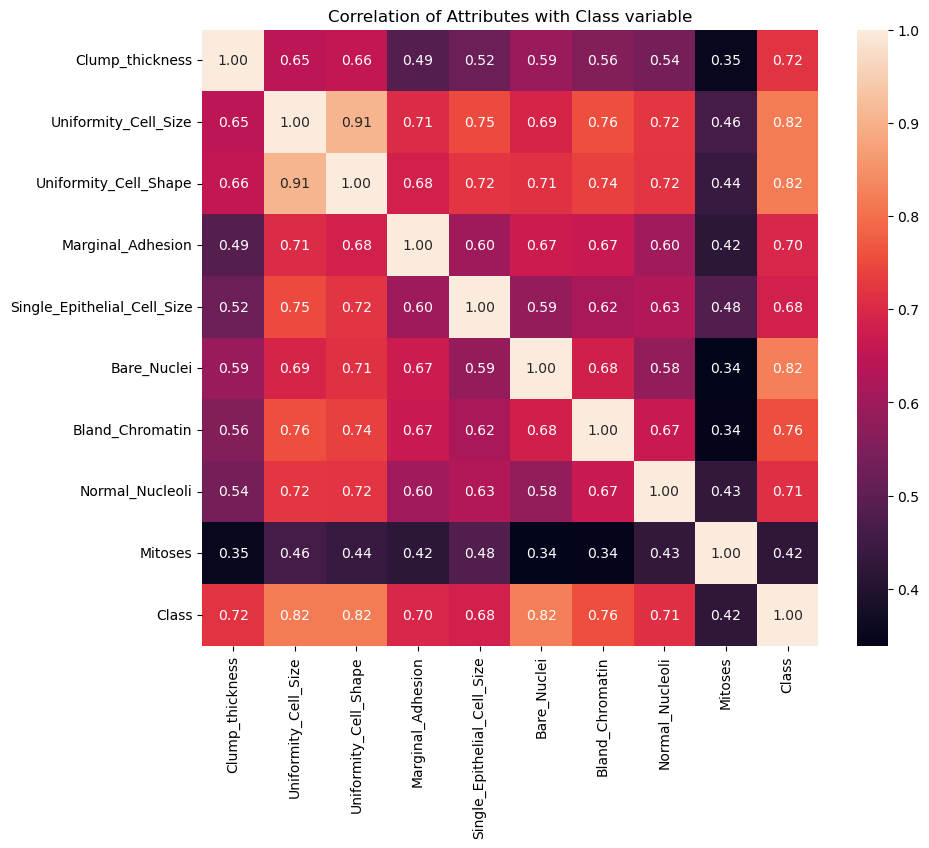

In [32]:
plt.figure(figsize=(10,8))
plt.title('Correlation of Attributes with Class variable')
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels())
a.set_yticklabels(a.get_yticklabels())           
plt.show()

# Independent and dependent 

In [33]:
X = data.drop(['Class'], axis=1)

y = data['Class']

# Split data into separate training and test set

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [35]:
X_train.shape, X_test.shape

((558, 9), (140, 9))

# Feature Engineering

**Feature Engineering** is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.

In [36]:
X_train.isnull().sum()

Clump_thickness                 0
Uniformity_Cell_Size            0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    15
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
dtype: int64

In [37]:
X_test.isnull().sum()

Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    1
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
dtype: int64

## Mean

In [38]:
for col in X_train.columns:
    if X_train[col].isnull().mean()>0:
        print(col, round(X_train[col].isnull().mean(),4))

Bare_Nuclei 0.0269


## Median

In [39]:
for df1 in [X_train, X_test]:
    for col in X_train.columns:
        col_median=X_train[col].median()
        df1[col].fillna(col_median, inplace=True)           

In [40]:
X_train.isnull().sum()

Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
dtype: int64

In [41]:
X_test.isnull().sum()

Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
dtype: int64

# Feature Scaling

In [42]:
cols = X_train.columns

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [44]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [45]:
X_test = pd.DataFrame(X_test, columns=[cols])

## K Neighbours Classifier

In [46]:
from sklearn.neighbors import KNeighborsClassifier

# instantiate the model
knn = KNeighborsClassifier(n_neighbors=3)

# fit the model to the training set
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

#  Predict test-set results

In [47]:
y_pred = knn.predict(X_test)

y_pred

array([4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 4,
       4, 4, 2, 4, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4,
       4, 4, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4,
       4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 2,
       2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2, 2, 4, 4, 4, 4, 2, 2, 4, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 4, 4, 4, 2, 2, 4, 2, 2, 4, 4,
       2, 4, 2, 2, 2, 2, 4, 4], dtype=int64)

# Check accuracy score 

In [48]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.9714


In [49]:
y_pred_train = knn.predict(X_train)

In [50]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9803


# Check for overfitting and underfitting

In [51]:
print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))

Training set score: 0.9803
Test set score: 0.9714


## Rebuild kNN Classification model using different values of k

In [52]:
knn_5 = KNeighborsClassifier(n_neighbors=5)


# fit the model to the training set
knn_5.fit(X_train, y_train)


# predict on the test-set
y_pred_5 = knn_5.predict(X_test)


print('Model accuracy score with k=5 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_5)))

Model accuracy score with k=5 : 0.9714


## Rebuild kNN Classification model using k=6

In [53]:
knn_6 = KNeighborsClassifier(n_neighbors=6)


# fit the model to the training set
knn_6.fit(X_train, y_train)


# predict on the test-set
y_pred_6 = knn_6.predict(X_test)


print('Model accuracy score with k=6 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_6)))

Model accuracy score with k=6 : 0.9643


## Rebuild kNN Classification model using k=7

In [54]:
knn_7 = KNeighborsClassifier(n_neighbors=7)


# fit the model to the training set
knn_7.fit(X_train, y_train)


# predict on the test-set
y_pred_7 = knn_7.predict(X_test)


print('Model accuracy score with k=7 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_7)))

Model accuracy score with k=7 : 0.9571


## Rebuild kNN Classification model using k=8

In [55]:
knn_8 = KNeighborsClassifier(n_neighbors=8)


# fit the model to the training set
knn_8.fit(X_train, y_train)


# predict on the test-set
y_pred_8 = knn_8.predict(X_test)


print('Model accuracy score with k=8 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_8)))

Model accuracy score with k=8 : 0.9643


## Rebuild kNN Classification model using k=9

In [56]:
knn_9 = KNeighborsClassifier(n_neighbors=9)


# fit the model to the training set
knn_9.fit(X_train, y_train)


# predict on the test-set
y_pred_9 = knn_9.predict(X_test)


print('Model accuracy score with k=9 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_9)))

Model accuracy score with k=9 : 0.9643


Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.

## Confusion matrix

A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-

**True Positives (TP)** – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

**True Negatives (TN)** – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

**False Positives (FP)** – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.

**False Negatives (FN)** – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error.

In [57]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[83  2]
 [ 2 53]]

True Positives(TP) =  83

True Negatives(TN) =  53

False Positives(FP) =  2

False Negatives(FN) =  2


The confusion matrix shows 83 + 53 = 136 correct predictions and 2 + 2 = 4 incorrect predictions.

In this case, we have

True Positives (Actual Positive:1 and Predict Positive:1) - 83

True Negatives (Actual Negative:0 and Predict Negative:0) - 53

False Positives (Actual Negative:0 but Predict Positive:1) - 2 (Type I error)

False Negatives (Actual Positive:1 but Predict Negative:0) - 2 (Type II error)

In [58]:
cm_7 = confusion_matrix(y_test, y_pred_7)

print('Confusion matrix\n\n', cm_7)

print('\nTrue Positives(TP) = ', cm_7[0,0])

print('\nTrue Negatives(TN) = ', cm_7[1,1])

print('\nFalse Positives(FP) = ', cm_7[0,1])

print('\nFalse Negatives(FN) = ', cm_7[1,0])

Confusion matrix

 [[82  3]
 [ 3 52]]

True Positives(TP) =  82

True Negatives(TN) =  52

False Positives(FP) =  3

False Negatives(FN) =  3


The above confusion matrix shows 82 + 52 = 134 correct predictions and 3 + 3 = 6 incorrect predictions.

In this case, we have

True Positives (Actual Positive:1 and Predict Positive:1) - 82

True Negatives (Actual Negative:0 and Predict Negative:0) - 52

False Positives (Actual Negative:0 but Predict Positive:1) - 3 (Type I error)

False Negatives (Actual Positive:1 but Predict Negative:0) - 3 (Type II error)

## Comment

<Axes: >

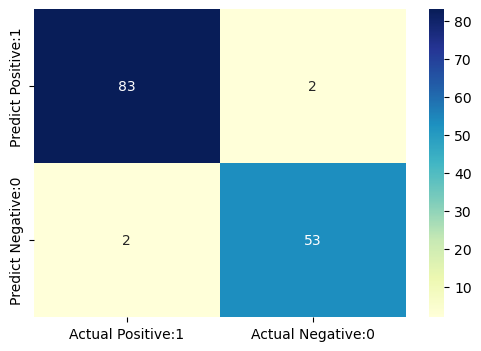

In [79]:
plt.figure(figsize=(6,4))

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

##  Classification metrices

Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model. I have described these terms in later.

In [61]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_7))

              precision    recall  f1-score   support

           2       0.96      0.96      0.96        85
           4       0.95      0.95      0.95        55

    accuracy                           0.96       140
   macro avg       0.96      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140



# Classification accuracy

In [66]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [67]:
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9714


# Classification error

In [68]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0286


# Precision

**Precision** can be defined as the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true and false positives (TP + FP).

So, **Precision** identifies the proportion of correctly predicted positive outcome. It is more concerned with the positive class than the negative class.

Mathematically, precision can be defined as the ratio of TP to (TP + FP).

In [69]:
precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9765


# Recall

**Recall** can be defined as the percentage of correctly predicted positive outcomes out of all the actual positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true positives and false negatives (TP + FN). Recall is also called Sensitivity.

**Recall** identifies the proportion of correctly predicted actual positives.

Mathematically, recall can be given as the ratio of TP to (TP + FN).

In [70]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9765


# True Positive Rate

True Positive Rate is synonymous with Recall.

In [71]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.9765


# False Positive Rate

In [72]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.0364


# Specificity

In [73]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.9636


## F1-score

**F1-score** is the weighted harmonic mean of precision and recall. The best possible **F1-score** would be 1.0 and the worst 
would be 0.0.  **F1-score** is the harmonic mean of precision and recall. So, **F1-score** is always lower than accuracy measures as they embed precision and recall into their computation. The weighted average of `f1-score` should be used to 
compare classifier models, not global accuracy.


## Adjusting the classification threshold level

In [74]:
y_pred_prob = knn.predict_proba(X_test)[0:10]

y_pred_prob

array([[0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.33333333, 0.66666667],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ]])

## Observations

- In each row, the numbers sum to 1.


- There are 2 columns which correspond to 2 classes - 2 and 4. 


    - Class 2 - predicted probability that there is benign cancer.    
    
    - Class 4 - predicted probability that there is malignant cancer.
        
    
- Importance of predicted probabilities

    - We can rank the observations by probability of benign or malignant cancer.


- predict_proba process

    - Predicts the probabilities    
    
    - Choose the class with the highest probability    
    
    
- Classification threshold level

    - There is a classification threshold level of 0.5.    
    
    - Class 4 - probability of malignant cancer is predicted if probability > 0.5.    
    
    - Class 2 - probability of benign cancer is predicted if probability < 0.5.    
    


In [76]:
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - benign cancer (2)', 'Prob of - malignant cancer (4)'])

y_pred_prob_df

,Prob of - benign cancer (2),Prob of - malignant cancer (4)
0,0.000000,1.000000
1,1.000000,0.000000
2,0.000000,1.000000
3,0.333333,0.666667
4,1.000000,0.000000
5,1.000000,0.000000
6,1.000000,0.000000
7,1.000000,0.000000
8,1.000000,0.000000
9,1.000000,0.000000


In [77]:
knn.predict_proba(X_test)[0:10, 1]

array([1.        , 0.        , 1.        , 0.66666667, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [78]:
y_pred_1 = knn.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

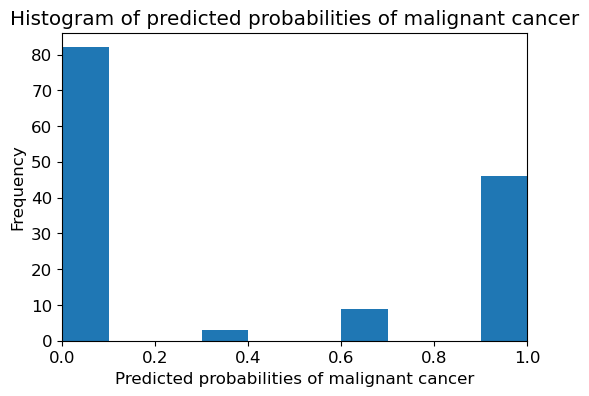

In [80]:
# adjust figure size
plt.figure(figsize=(6,4))


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred_1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of malignant cancer')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of malignant cancer')
plt.ylabel('Frequency')

## Observations

We can see that the above histogram is positively skewed.

The first column tell us that there are approximately 80 observations with 0 probability of malignant cancer.

There are few observations with probability > 0.5.

So, these few observations predict that there will be malignant cancer.

## Comments

In binary problems, the threshold of 0.5 is used by default to convert predicted probabilities into class predictions.

Threshold can be adjusted to increase sensitivity or specificity.

Sensitivity and specificity have an inverse relationship. Increasing one would always decrease the other and vice versa.

Adjusting the threshold level should be one of the last step you do in the model-building process.

# ROC Curve

Another tool to measure the classification model performance visually is **ROC Curve**. ROC Curve stands for **Receiver Operating Characteristic Curve**. An **ROC Curve** is a plot which shows the performance of a classification model at various 
classification threshold levels. 



The **ROC Curve** plots the **True Positive Rate (TPR)** against the **False Positive Rate (FPR)** at various threshold levels.




**True Positive Rate (TPR)** is also called **Recall**. It is defined as the ratio of **TP to (TP + FN)**.





**False Positive Rate (FPR)** is defined as the ratio of **FP to (FP + TN)**.




In the ROC Curve, we will focus on the TPR (True Positive Rate) and FPR (False Positive Rate) of a single point. This will give us the general performance of the ROC curve which consists of the TPR and FPR at various threshold levels. So, an ROC Curve plots TPR vs FPR at different classification threshold levels. If we lower the threshold levels, it may result in more items being classified as positve. It will increase both True Positives (TP) and False Positives (FP).




In [93]:
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred_1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9883


## Interpretation

- ROC AUC is a single number summary of classifier performance. The higher the value, the better the classifier.

- ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a good job in predicting whether it is benign or malignant cancer.

In [97]:
from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(knn_7, X_train, y_train, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.9811


## Results and Conclusion

1.In this project, I build a kNN classifier model to classify the patients suffering from breast cancer. The model yields very good performance as indicated by the model accuracy which was found to be 0.9571 with k=7.

2.With k=3, the training-set accuracy score is 0.9803 while the test-set accuracy to be 0.9714. These two values are quite comparable. So, there is no question of overfitting.

3.kNN Classification model with k=3 is 0.9714 shows more accurate predictions and less number of errors than k=7 model is 0.9571. Hence, we got performance improvement with k=3.